# An SVM model for the Wine dataset

## Index
### Dataset
### Visualizing the Dataset
#### > 3D Visualization
#### > 2D Visualization
### Building the model
### Visualizing the Decision Boundry
#### > 2D Boundry Visualization
### Bonus Content

## Dataset

In [2]:
from sklearn.datasets import load_wine
x,y = load_wine(return_X_y=True)
print(x.shape," ",y.shape)

(178, 13)   (178,)


## Visualizing the Dataset

### 3D Visualization

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(x)

print(pca_result.shape)

x1 = pca_result[:,0]
x2 = pca_result[:,1] 
x3 = pca_result[:,2]

(178, 3)


In [4]:
# %matplotlib widget -> uncomment for interactive widgets

In [5]:
from random import randint
def get_colors(N):
    colors=[]
    for i in range(0,N):
        colors.append('#{:06x}'.format(randint(0, 256**3)))
    return colors

In [6]:
def get_handles(colors):
    handles=[]
    for i in range(len(colors)):
        handles.append(mpatches.Patch(color=colors[i], label='Class'+str(i)))
    return handles

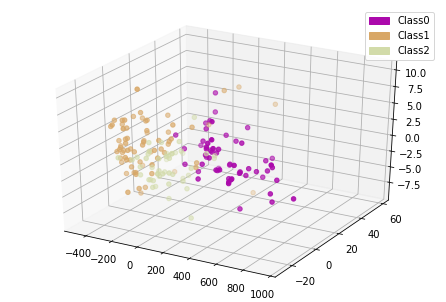

In [23]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
colors = get_colors(len(np.unique(y)))

ax.scatter(x1,x2,x3,c=y,cmap=matplotlib.colors.ListedColormap(colors))

plt.legend(handles=get_handles(colors))
# plt.legend(loc='best')
plt.show()

### 2D Visualization

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

print(pca_result.shape)

x1 = pca_result[:,0]
x2 = pca_result[:,1]

(178, 2)


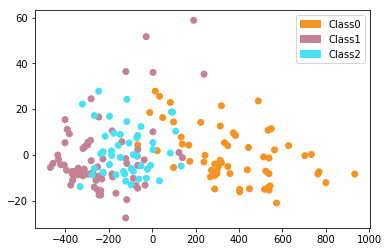

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#the dataset has len(np.unique(y)) Classes
colors = get_colors(len(np.unique(y)))

ax.scatter(x1,x2,c=y,cmap=matplotlib.colors.ListedColormap(colors))

plt.legend(handles=get_handles(colors))

plt.show()

## Building the Model

In [10]:
from sklearn.svm import SVC
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1,verbose=True)
#,max_iter=10,cache_size=7000
# Train the classifier
svm.fit(x, y)

[LibSVM]

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=True)

In [11]:
y_pred=svm.predict(x)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9943820224719101

## Visualizing the Decision Boundry

### 2D Boundry Visualization

Task 1-> Perform PCA; Get min and max array values for 2D visualization

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

print(pca_result.shape)

x1 = pca_result[:,0]
x2 = pca_result[:,1]

(178, 2)


In [14]:
x1_min, x1_max = x1.min() - 10, x1.max() + 10
x2_min, x2_max = x2.min() - 10, x2.max() + 10

Task 2-> Get Grid

In [15]:
import numpy as np
resolution=10
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

In [16]:
xx1.shape

(11, 143)

In [17]:
xx2.shape

(11, 143)

Task 3-> Get Reverse PCA Values

In [18]:
temp_points=[]
for i in range(xx1.shape[0]):
    for j in range(xx1.shape[1]):
        temp_points.append([xx1[i,j],xx2[i,j]])
temp_points=np.array(temp_points)

In [19]:
temp_points.shape

(1573, 2)

In [20]:
original_space_temp_points=pca.inverse_transform(temp_points)

Task 4-> Predict Results

In [21]:
Z=svm.predict(original_space_temp_points)

Task 5-> Plot points and boundries

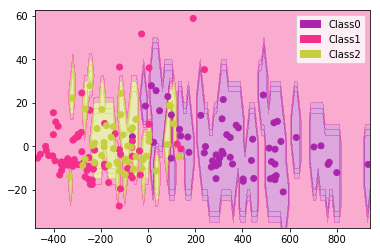

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib


Z = Z.reshape(xx1.shape)

colors = get_colors(len(np.unique(y)))

plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.scatter(x1,x2,c=y,cmap=matplotlib.colors.ListedColormap(colors))

plt.legend(handles=get_handles(colors))

plt.show()

In [ ]:
#Feel free try 3D if needed

## Bonus Content

* [Chris Abalon](https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/)
* [Matplotlib 3D Tutorial](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)